# Proyecto 1 - NLP

## Revision de ___ en comentarios de libros 

#### Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud, STOPWORDS

#Librerias para sampling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

#Librerias para vectorizacion
from sklearn.feature_extraction.text import TfidfVectorizer

# Librerias pas ML
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Librerias Red Neuronal
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import nltk
#nltk.download('punkt')


C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\m.alvarezg1\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Importación de datos

In [16]:
data = pd. read_csv('data/reviews.csv')

#### Preparación e los datos

1. Se se paro la columna helpfull en dpos columnas. Las veces que se le dio helpfull postivo, y las veces totales que se le ha dado helpful

In [21]:
data['Helpful Total'] = data['helpful'].str.replace("[","")
data['Helpful Total'] = data['Helpful Total'].str.replace("]","")
separacion = data['Helpful Total'].str.split(",",expand=True)
data['Helpful Total']=separacion[1].astype(int)
data['Helpful Positivo']=separacion[0].astype(int)
data[["helpful", "reviewText"]]

C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_10636/298461444.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Helpful Total'] = data['helpful'].str.replace("[","")
C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_10636/298461444.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Helpful Total'] = data['Helpful Total'].str.replace("]","")


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,0,0
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,2,2
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,0,0
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1,1
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600,0,0


2. Se omiteron los regitso que no han sido calificados helpfull ninguna vezy se calculo la tasa de positividad

In [22]:
# Filtar los reviws que no han sido clasificados como helpful
data = data[data["Helpful Total"] >0 ]
data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']
data.head()

C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_10636/977309752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Helpful Rate'] = data['Helpful Positivo']/data['Helpful Total']


,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful Total,Helpful Positivo,Helpful Rate
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2,2,1.0
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2,2,1.0
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1,1,1.0
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1,0,0.0
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400,1,1,1.0


#### Limpieza de los datos

In [49]:
df = data[["Helpful Rate", "reviewText",]]
df = df.reset_index()
df = df.drop(columns=["index"])
df = df.dropna()

In [50]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import unidecode
import unicodedata

In [51]:
# Puntucacion
punctuations = string.punctuation
# Carga los modelos de spacy y las stopwords
parser = en_core_web_sm.load()
stop_words = STOP_WORDS

In [52]:
def clean_text(text):
    # Elimina espacios, emojis, números y convierte todo a minúscula.
    text = str(text)
    text = text.replace('\n','').replace('\r','').replace('\t','').strip().lower()
    text = re.sub(r'\d+', '', text)
    allchars = [str for str in text] 
    text=''.join((c for c in unicodedata.normalize('NFD',text) if unicodedata.category(c) != 'Mn'))
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    # Tokenize
    token = parser(text)
    # Lemmatize
    token = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in token]
    # Quita stopwords y signos de puntuación
    token = ' '.join([word for word in token if word not in stop_words and word not in punctuations])
    token = unidecode.unidecode(token)
    token = ' '.join([w for w in token.split() if len(w)>1])
    return token

In [53]:
df["CleanText"]=df["reviewText"].apply(clean_text)
df.head(10)

,Helpful Rate,reviewText,CleanText
0,1.0,This book is a reissue of an old one; the auth...,book reissue old author bear era nero wolfe in...
1,1.0,This was a fairly interesting read. It had ol...,fairly interesting read old style terminology ...
2,1.0,I'd never read any of the Amy Brewster mysteri...,read amy brewster mystery hooked
3,0.0,"If you like period pieces - clothing, lingo, y...",like period piece clothing lingo enjoy mystery...
4,1.0,Never heard of Amy Brewster. But I don't need ...,hear amy brewster don need like amy brewster l...
5,1.0,"Another well written eBook by Troy Denning, bu...",write ebook troy den balance point write belon...
6,0.0,This one promises to be another good book. I h...,promise good book read series far
7,1.0,Most of the New Jedi Order books focus on the ...,new jedi order book focus solo kid extent view...
8,1.0,Originally published as an e-book coinciding w...,originally publish book coincide release novel...
9,0.0,This book was a good idea. I have always wante...,book good idea want read chewbacca son lumpy w...


In [55]:
clean_df = pd.DataFrame()
clean_df["Helpful Rate"] = df["Helpful Rate"]
clean_df["CleanText"] =df["CleanText"]
clean_df.to_csv("data/dataNLP05.csv")

#### Análisis de los datos

In [2]:
data= pd.read_csv('data/dataNLP05.csv', index_col=0)
data = data.dropna()

 Distribución de la tasa de postividad en helpfull

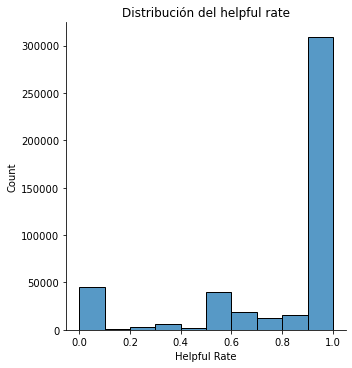

In [3]:
sns.displot(data["Helpful Rate"],bins = 10).set(title="Distribución del helpful rate");

#### Definición  de la vriable de salida

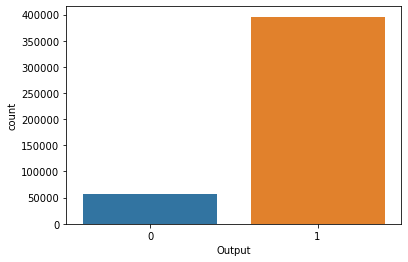

In [4]:
data["Output"] = np.where(data["Helpful Rate"] >= 0.5,1, 0)
sns.countplot(x="Output", data=data);

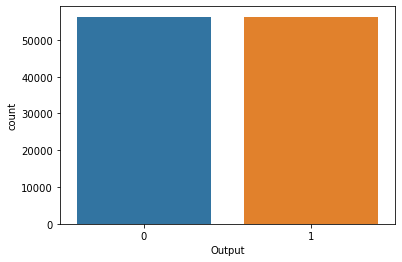

In [5]:
undersample = RandomUnderSampler(sampling_strategy='majority')
y = data['Output']
X = data['CleanText'].values.reshape(-1, 1) 
X_under, y_under = undersample.fit_resample(X, y)
sns.countplot(x=y_under);

#### Exploración

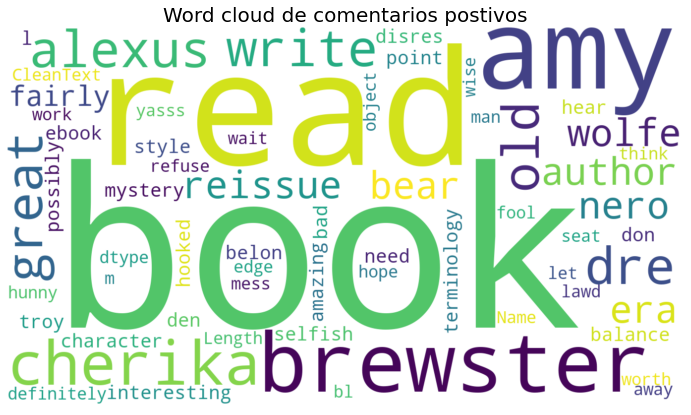

In [68]:
plt.figure(figsize=(14,7))
positive_text = ''.join(str(data[data['Output'] == 1].CleanText))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios postivos',fontsize=20)
plt.show()

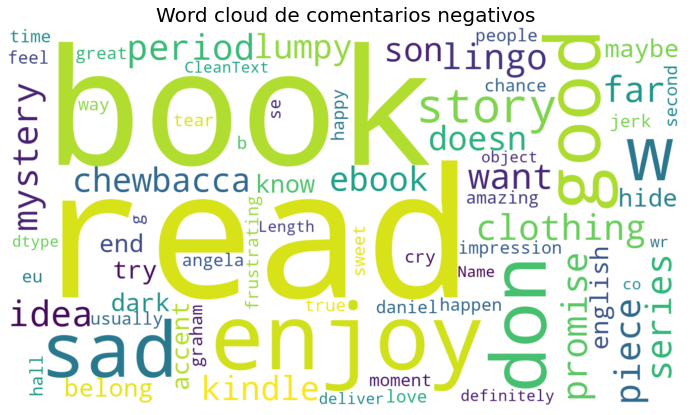

In [70]:
plt.figure(figsize=(14,7))
negative_text = ''.join(str(data[data['Output'] == 0].CleanText))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 100, width=1366, height=768, background_color="white").generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud de comentarios negativos',fontsize=20)
plt.show()

#### Conversión a vectores

In [6]:
data = data.drop(columns=["Helpful Rate"])

In [7]:
sample_inex = sklearn.utils.random.sample_without_replacement(data.shape[0],40000)
sample = data.iloc[sample_inex,]
sample

,CleanText,Output
432291,couldn book finish amazingly dark story hold r...,1
182946,having read enjoy pearl series ms white anxiou...,1
118456,short book author good job develop character r...,1
168911,obviously second series apparently april conti...,1
291019,book good start finish wait installment,1
...,...,...
411749,lexi incognito gay friend raj run recognize en...,1
87868,speak health fanatic fror year psychotherapist...,1
152071,alasdair marquess datchworth deep drug induce ...,1
120758,fictional fantasy thriller lumanite seven crys...,1


In [9]:
#import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

# Si no tienes el modelo descargado se corre este comando
#we = api.load("word2vec-google-news-300")
# Una vez se ha descargado solo es leerlo
we = KeyedVectors.load_word2vec_format(datapath("GoogleNews-vectors-negative300.bin"), binary=True)
#we = KeyedVectors.load('C:/Users\m.alvarezg1\gensim-data\word2vec-google-news-300\word2vec-google-news-300', mmap = 'r')

C:\Users\m.alvarezg1\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [11]:
we.most_similar(["good"])

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [11]:
def vectorize(text):
    tokens = tokenize_text(text)
    vec = np.zeros(300)
    for word in tokens:
        if word in we:
            vec += we[word]
    return vec

In [12]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [16]:
sample['vect_tl'] = sample['CleanText'].apply(vectorize)

C:\Users\ME1C0~1.ALV\AppData\Local\Temp\2/ipykernel_12348/2837384202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['vect_tl'] = sample['CleanText'].apply(vectorize)


In [13]:
sample

,CleanText,Output,vect_tl
283671,look tip date game like experience safe distan...,1,"[1.7034339904785156, 0.16876220703125, -1.1476..."
379096,love book unique different think people love a...,1,"[3.685455322265625, 0.16546630859375, -1.96542..."
415791,book ws awesome way meet tey fall hard tradegy...,1,"[0.4251708984375, 1.156982421875, -0.283203125..."
182116,like book read author add favorite story line ...,1,"[0.94879150390625, 0.4298095703125, -0.1137542..."
39705,notsure expect tiny alien fore invasion story ...,1,"[1.0266876220703125, 1.043212890625, -0.856246..."
...,...,...,...
108441,read lot live read book write long ago annoyin...,1,"[0.5926513671875, -0.202392578125, -0.76054382..."
268076,little afternoon delight originally publish sn...,1,"[2.4736509323120117, -0.715301513671875, -1.80..."
6131,good debut novel new direct digital novelist m...,1,"[13.623847961425781, 3.9373340606689453, -2.74..."
407365,uggggh don wrong way love episode huge kane fa...,1,"[3.5026473999023438, 1.61883544921875, -0.8066..."


Se separa la muestra 90% train y 10% test

In [14]:
Y = sample["Output"]
X = np.vstack(sample['vect_tl'].values)
#X = sample["CleanText"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

####  Model o KNN  con Word Embeddings

In [22]:
Pipeline_KNN = Pipeline(steps = [("knn", KNeighborsClassifier())])

Param_KNN = {
    'knn__n_neighbors': [25,35,45, 55 , 65 , 75 ,85 ,95, 100, 500 , 1000],
    'knn__weights': ['uniform','distance'],
    'knn__algorithm':["ball_tree", "kd_tree", "brute"]
}

Grid_KNN = RandomizedSearchCV(estimator = Pipeline_KNN, param_distributions = Param_KNN, scoring = 'accuracy', cv = 10, n_iter = 80, n_jobs = -1)

In [23]:
Grid_KNN.fit(x_train,y_train)
print('Mejores Parametros: %s' % Grid_KNN.best_params_)
print('Mejor accuracy en Train: %.3f' % Grid_KNN.best_score_)

C:\Users\nicoc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 66 is smaller than n_iter=80. Running 66 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores Parametros: {'knn__weights': 'uniform', 'knn__n_neighbors': 55, 'knn__algorithm': 'ball_tree'}
Mejor accuracy en Train: 0.872


In [24]:
y_pred = Grid_KNN.best_estimator_.predict(x_test)
y_pred_proba = Grid_KNN.best_estimator_.predict_proba(x_test)[:,1]
print('La precisión del modelo Random Forest con TF- IDF  calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Random Forest con TF- IDF calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo Random Forest con TF- IDF  calibrado es: 0.88
El AUC del modelo Random Forest con TF- IDF calibrado es: 0.69


In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

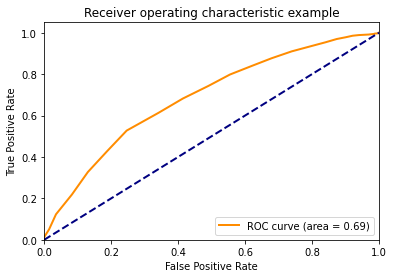

In [26]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Modelo Random Forest  con Word Embeddings

Se crea un Pipeline con un modelo RanfomForest que se calibra por medio de  RandomSearchCV para encontrar los hiperparámetros que minimizan el error.

In [15]:
Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 30, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 10, n_iter = 100, n_jobs = -1)

In [16]:
Grid_RF.fit(x_train,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.30000000000000004, 'RF__min_samples_leaf': 0.1, 'RF__max_features': 'log2', 'RF__max_depth': 14.73684210526316}
Mejor AUC en Train: 0.872


##### Resulatados del modelo 

In [18]:
y_pred = Grid_RF.best_estimator_.predict(x_test)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test)[:,1]
print('La precisión del modelo Random Forest con TF- IDF  calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Random Forest con TF- IDF calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo Random Forest con TF- IDF  calibrado es: 0.88
El AUC del modelo Random Forest con TF- IDF calibrado es: 0.67


In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

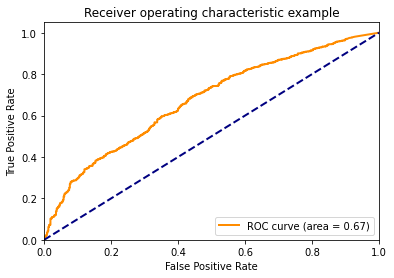

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

####  Red Neuronal Recurrente con Word Embeddings

In [12]:
X = sample['CleanText'].values
Y = sample['Output'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [13]:
tokenizer = Tokenizer(oov_token = '<UNK>')
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50
embedding_dim = 300

In [14]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i > vocab_size:
        continue
    if word in we:
        embedding_matrix[i] = we[word]

In [15]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_tokens, maxlen = max_length, padding = 'post')
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_length, padding = 'post')

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], input_length = max_length, trainable = False))
model.add(LSTM(units = 256, dropout = 0.1, recurrent_dropout = 0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.0001), metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 300)           14187300  
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 14,790,693
Trainable params: 603,393
Non-trainable params: 14,187,300
_________________________________________________________________


In [33]:
history = model.fit(x_train_pad, y_train, batch_size = 1024 , epochs = 10, validation_data = (x_test_pad, y_test), verbose = 1)

Epoch 1/10
36/36 [==============================] - 79s 2s/step - loss: 0.5426 - accuracy: 0.8664 - val_loss: 0.3853 - val_accuracy: 0.8760
Epoch 2/10
36/36 [==============================] - 76s 2s/step - loss: 0.3672 - accuracy: 0.8760 - val_loss: 0.3612 - val_accuracy: 0.8760
Epoch 3/10
36/36 [==============================] - 76s 2s/step - loss: 0.3596 - accuracy: 0.8760 - val_loss: 0.3588 - val_accuracy: 0.8760
Epoch 4/10
36/36 [==============================] - 76s 2s/step - loss: 0.3580 - accuracy: 0.8760 - val_loss: 0.3572 - val_accuracy: 0.8760
Epoch 5/10
36/36 [==============================] - 76s 2s/step - loss: 0.3558 - accuracy: 0.8760 - val_loss: 0.3543 - val_accuracy: 0.8760
Epoch 6/10
36/36 [==============================] - 76s 2s/step - loss: 0.3508 - accuracy: 0.8760 - val_loss: 0.3515 - val_accuracy: 0.8760
Epoch 7/10
36/36 [==============================] - 76s 2s/step - loss: 0.3461 - accuracy: 0.8760 - val_loss: 0.3493 - val_accuracy: 0.8760
Epoch 8/10
36/36 [==

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

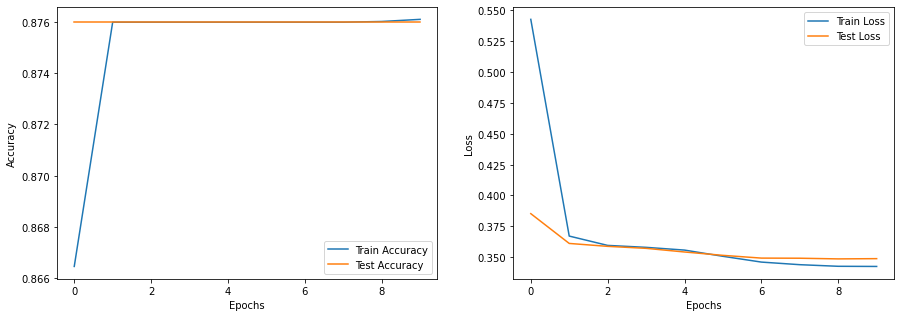

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

ax[0].plot(epochs, acc, label = 'Train Accuracy')
ax[0].plot(epochs, val_acc, label = 'Test Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, label = 'Train Loss')
ax[1].plot(epochs, val_loss, label = 'Test Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();

In [37]:
y_pred_proba = model.predict(x_test_pad)
y_pred_proba

array([[0.79019296],
       [0.61354166],
       [0.8316796 ],
       ...,
       [0.7873671 ],
       [0.9441544 ],
       [0.9156437 ]], dtype=float32)

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

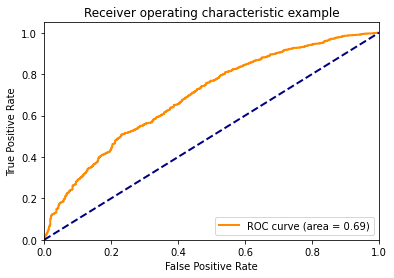

In [39]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()